## 4.1 0Coding Etiquette & Excel Reporting 

### Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import gc

### Setting Path

In [2]:
path = r'\Users\edwin\Instacart Basket Analysis'
path

'\\Users\\edwin\\Instacart Basket Analysis'

#### Importing the Data

In [3]:
# Load the merged dataset
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [4]:
ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,...,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,merge_2
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


In [5]:
print(ords_prods_all.columns)

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', 'existing_merge', 'merge_1',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'customer_frequency',
       'frequency_flag', 'First Name', 'Surnam', 'Gender', 'STATE', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'merge_2'],
      dtype='object')


In [6]:
ords_prods_all.rename(columns={'STATE': 'state'}, inplace=True)

In [7]:
print(ords_prods_all.columns)

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', 'existing_merge', 'merge_1',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'customer_frequency',
       'frequency_flag', 'First Name', 'Surnam', 'Gender', 'state', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'merge_2'],
      dtype='object')


### 2 Address security implications

In [8]:
# Drop PII columns if they exist
pii_columns = ['email', 'phone_number']
ords_prods_all = ords_prods_all.drop(columns=pii_columns, errors='ignore')

# Alternatively, anonymize customer_id if required (hashing, etc.)
# ords_prods_all['customer_id'] = ords_prods_all['customer_id'].apply(lambda x: hash(x))

# Display the first few rows to confirm changes
ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,...,First Name,Surnam,Gender,state,Age,date_joined,n_dependants,fam_status,income,merge_2
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


### 3 Create a regional segmentation of the data

In [9]:
# Create Region column - organize by state and region
northeast_region = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont' ]

In [10]:
midwest_region = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [11]:
south_region = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [12]:
west_region = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [13]:
# Create region columns
ords_prods_all.loc[ords_prods_all['state'].isin(northeast_region), 'region'] = 'Northeast'

In [14]:
ords_prods_all.loc[ords_prods_all['state'].isin(midwest_region), 'region'] = 'Midwest'

In [15]:
ords_prods_all.loc[ords_prods_all['state'].isin(south_region), 'region'] = 'South'

In [16]:
ords_prods_all.loc[ords_prods_all['state'].isin(west_region), 'region'] = 'West'

In [17]:
# Check data
ords_prods_all['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

### 3.2. Create a crosstab to compare spending habits in different regions

In [18]:
# Create region_spending crosstab
region_spending_crosstab = pd.crosstab(ords_prods_all['region'], ords_prods_all['spending_flag'], dropna = False)
region_spending_crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


#### 4 The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [19]:
# Exclude customers w/ max_order less than 5 
ords_prods_all['exclusion_flag'] = 'Keep'  # Initialize with 'Keep'
ords_prods_all.loc[ords_prods_all['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

In [20]:
# Check frequencies
print(ords_prods_all['exclusion_flag'].value_counts(dropna=False))

exclusion_flag
Keep       30964564
Exclude     1440295
Name: count, dtype: int64


In [21]:
# Check exclusion flag using crosstab
exclusion_flag_check = pd.crosstab(ords_prods_all['exclusion_flag'], ords_prods_all['max_order'], dropna=False)

In [22]:
# Export crosstab to clipboard (optional)
exclusion_flag_check.to_clipboard()

In [23]:
# Create sample without 'Exclude' rows using query method
ords_prods_all_in = ords_prods_all.query('exclusion_flag == "Keep"')

In [24]:
# Check sample
print(ords_prods_all_in.shape)

(30964564, 38)


In [25]:
ords_prods_all_in.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404858
Data columns (total 38 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int32   
 1   product_name            category
 2   aisle_id                int16   
 3   department_id           int16   
 4   prices                  float32 
 5   order_id                int32   
 6   user_id                 int32   
 7   order_number            int32   
 8   orders_day_of_week      int8    
 9   order_time_of_day       int8    
 10  days_since_prior_order  float32 
 11  first_order             int8    
 12  add_to_cart_order       int16   
 13  reordered               int8    
 14  existing_merge          category
 15  merge_1                 category
 16  price_range_loc         category
 17  busiest_day             category
 18  busiest_days            category
 19  busiest_period_of_day   category
 20  max_order               int32   
 21  loyalty_fla

In [33]:
ords_prods_all_in.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404858
Data columns (total 38 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int32   
 1   product_name            category
 2   aisle_id                int16   
 3   department_id           int16   
 4   prices                  float32 
 5   order_id                int32   
 6   user_id                 int32   
 7   order_number            int32   
 8   orders_day_of_week      int8    
 9   order_time_of_day       int8    
 10  days_since_prior_order  float32 
 11  first_order             int8    
 12  add_to_cart_order       int16   
 13  reordered               int8    
 14  existing_merge          category
 15  merge_1                 category
 16  price_range_loc         category
 17  busiest_day             category
 18  busiest_days            category
 19  busiest_period_of_day   category
 20  max_order               int32   
 21  loyalty_fla

In [34]:
# Export the sample
ords_prods_all_in.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

MemoryError: 

#### 5 The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### Import new downsized data

In [26]:
# Load the downsized data
ords_prods_all_in = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers_small.pkl'))

In [29]:
print(ords_prods_all_in.columns)

Index(['department_id', 'prices', 'order_id', 'user_id', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'first_order',
       'reordered', 'existing_merge', 'merge_1', 'price_range_loc',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_product_price', 'spending_flag',
       'customer_frequency', 'frequency_flag', 'First Name', 'Surnam',
       'Gender', 'state', 'Age', 'date_joined', 'n_dependants', 'fam_status',
       'income', 'merge_2', 'region', 'exclusion_flag', 'age_group'],
      dtype='object')


In [30]:
ords_prods_all_in.rename(columns={'Age': 'age'}, inplace=True)

### Age
The age categories are subjective but adhere to conventional ranges. Young adult = <29, adult 30 - 39, middle age 40 - 49, senior 52 - 64, and elderly 65+.

In [31]:
ords_prods_all_in.loc[ords_prods_all_in['age'] <= 29, 'age_group'] = 'Young Adult'

In [32]:
ords_prods_all_in.loc[(ords_prods_all_in['age'] >= 30) & 
                    (ords_prods_all_in['age'] < 40), 'age_group'] = 'Adult'

In [33]:
ords_prods_all_in.loc[(ords_prods_all_in['age'] >= 40) & 
                    (ords_prods_all_in['age'] < 50), 'age_group'] = 'Middle Age'

In [34]:
ords_prods_all_in.loc[(ords_prods_all_in['age'] >= 50) & 
                    (ords_prods_all_in['age'] < 65), 'age_group'] = 'Senior'

In [35]:
ords_prods_all_in.loc[(ords_prods_all_in['age'] >= 65), 'age_group'] = 'Elderly'

In [36]:
# Check frequency of age_group and ensure no NaNs
ords_prods_all_in['age_group'].value_counts(dropna = True)

age_group
Elderly        3277944
Senior         2887289
Young Adult    2326589
Middle Age     1953762
Adult          1939457
Name: count, dtype: int64

In [37]:
ords_prods_all_in.dropna()

,department_id,prices,order_id,user_id,orders_day_of_week,order_time_of_day,days_since_prior_order,first_order,reordered,existing_merge,...,state,age,date_joined,n_dependants,fam_status,income,merge_2,region,exclusion_flag,age_group
0,19,5.8,3139998,138,6,11,3.0,0,0,both,...,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep,Elderly
2,19,5.8,389851,709,0,21,6.0,0,0,both,...,Vermont,66,6/16/2018,2,married,158302,both,Northeast,Keep,Elderly
5,19,5.8,1701441,777,1,7,26.0,0,0,both,...,Hawaii,51,1/4/2019,2,married,57797,both,West,Keep,Senior
8,19,5.8,369558,1052,1,20,19.0,0,0,both,...,Oregon,72,3/30/2018,1,married,153843,both,West,Keep,Elderly
12,19,5.8,1727826,1480,4,13,7.0,0,1,both,...,Alabama,19,12/28/2019,1,living with parents and siblings,32283,both,South,Keep,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404835,11,13.5,1288677,163632,1,8,30.0,0,1,both,...,New Hampshire,31,3/27/2018,2,married,67824,both,Northeast,Keep,Adult
32404844,11,13.5,1173882,178752,0,23,21.0,0,0,both,...,Washington,81,2/7/2019,2,married,103440,both,West,Keep,Elderly
32404851,11,13.5,362546,188073,2,4,30.0,0,0,both,...,Minnesota,20,1/23/2018,2,living with parents and siblings,27577,both,Midwest,Keep,Young Adult
32404853,11,13.5,3106363,197371,4,14,30.0,0,0,both,...,Alabama,62,10/25/2019,1,married,128072,both,South,Keep,Senior


### Income

In [38]:
ords_prods_all_in.loc[ords_prods_all_in['income'] <= 50000, 'income_group'] = 'Low'

In [39]:
ords_prods_all_in.loc[(ords_prods_all_in['income'] > 50000) & 
                    (ords_prods_all_in['income'] <= 100000), 'income_group'] = 'Middle'

In [40]:
ords_prods_all_in.loc[ords_prods_all_in['income'] > 100000, 'income_group'] = 'High'

In [41]:
# Check frequency of income_group and ensure no NaNs
ords_prods_all_in['income_group'].value_counts(dropna = False)

income_group
High      5683028
Middle    5356826
Low       1345187
Name: count, dtype: int64

### Dependents

In [42]:
ords_prods_all_in.loc[ords_prods_all_in['n_dependants'] == 0, 'dependents_flag'] = 'No Dependents'

In [43]:
# Ensure it is a copy
ords_prods_all_in = ords_prods_all_in.copy()

# Update 'dependents_flag' where 'n_dependants' is greater than 0
ords_prods_all_in.loc[ords_prods_all_in['n_dependants'] > 0, 'dependents_flag'] = 'Has Dependents'

# Update 'dependents_flag' where 'n_dependants' is 0
ords_prods_all_in.loc[ords_prods_all_in['n_dependants'] == 0, 'dependents_flag'] = 'No Dependents'

In [44]:
# Check data
ords_prods_all_in['dependents_flag'].value_counts(dropna = False)

dependents_flag
Has Dependents    9289787
No Dependents     3095254
Name: count, dtype: int64

### 6 Create an appropriate visualization to show the distribution of profiles.


In [45]:
# Create a unique user_id sample and take relevant columns
user_sample = ords_prods_all_in[['user_id', 'age_group', 'income_group', 'dependents_flag', 'region', 'loyalty_flag']]

In [46]:
# Remove duplicate rows in the user_sample to obtain a sample of all unique customers
user_sample = user_sample.drop_duplicates()

In [47]:
# Check data
user_sample

,user_id,age_group,income_group,dependents_flag,region,loyalty_flag
0,138,Elderly,Low,Has Dependents,Midwest,Regular customer
2,709,Elderly,High,Has Dependents,Northeast,New customer
5,777,Senior,Middle,Has Dependents,West,Regular customer
6,825,Young Adult,Low,Has Dependents,South,New customer
8,1052,Elderly,High,Has Dependents,West,Regular customer
...,...,...,...,...,...,...
31911736,200972,Middle Age,Middle,Has Dependents,West,New customer
31942913,99296,Elderly,Low,Has Dependents,Midwest,New customer
32059674,71469,Young Adult,Low,Has Dependents,South,New customer
32084812,140060,Elderly,Low,Has Dependents,Midwest,New customer


####  Age Groups

In [48]:
    # Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [49]:
## Create age_group counts table
age_group_counts = user_sample['age_group'].value_counts()

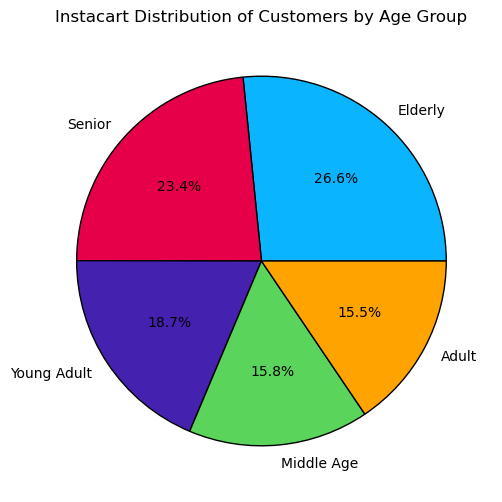

In [50]:
# Pie Chart
plt.figure(figsize=(6, 6)) # Control size of chart
plt.pie(age_group_counts, 
        labels = age_group_counts.index, 
        autopct='%.1f%%', # Show percentage to 1 d.p
        colors = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a', '#ffa300', '#ebdc78'], # colour palette
        wedgeprops = {'edgecolor' : 'black'}) # boarders
plt.title('Instacart Distribution of Customers by Age Group') # title
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_age_groups_pie.png'), bbox_inches = 'tight') # Save
plt.show()

### Income Groups

In [51]:
## Create a table of income_group counts
income_group_counts = user_sample['income_group'].value_counts()

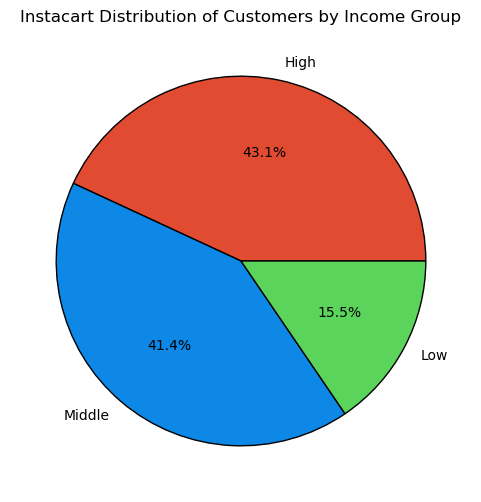

In [52]:
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(income_group_counts, 
        labels = income_group_counts.index, 
        autopct='%.1f%%',
        colors = ['#e14b31', '#0d88e6', '#5ad45a'],
        wedgeprops = {'edgecolor' : 'black'})
plt.title('Instacart Distribution of Customers by Income Group')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_income_groups_pie.png'), bbox_inches = 'tight')
plt.show()

### Dependents

In [53]:
# create a table of dependents_flag counts
dependents_flag_counts = user_sample['dependents_flag'].value_counts()

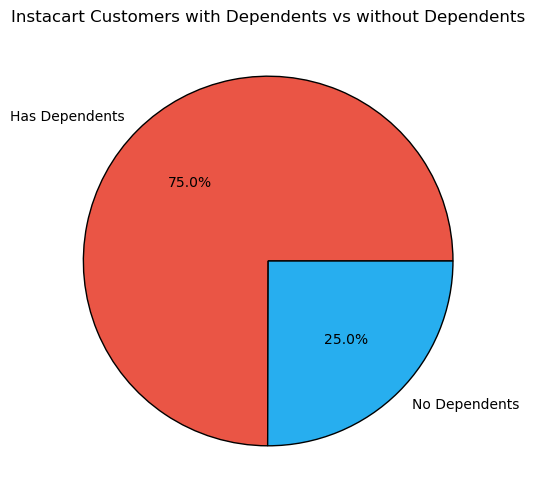

In [54]:
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(dependents_flag_counts, 
        labels = dependents_flag_counts.index, 
        autopct='%.1f%%', 
        colors = ['#ea5545', '#27aeef'],
        wedgeprops = {'edgecolor' : 'black'})
plt.title('Instacart Customers with Dependents vs without Dependents')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_dependents_pie.png'), bbox_inches = 'tight')
plt.show()

### 7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.


In [63]:
# Define categories for age, income, and dependants
ords_prods_all_in['age_category'] = pd.cut(ords_prods_all_in['age'], bins=[18, 25, 35, 45, 55, 65, 100], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66+'])
ords_prods_all_in['income_category'] = pd.cut(ords_prods_all_in['income'], bins=[0, 50000, 100000, 150000, 200000, 1000000], labels=['0-50K', '50-100K', '100-150K', '150-200K', '200K+'])
ords_prods_all_in['dependants_category'] = pd.cut(ords_prods_all_in['n_dependants'], bins=[0, 1, 2, 3, 4, 5, 10], labels=['0', '1', '2', '3', '4', '5+'])

In [64]:
# Aggregate max, mean, and min for usage frequency and expenditure by age, income, and dependants category
customer_profile_agg = ords_prods_all_in.groupby(['age_category', 'income_category', 'dependants_category']).agg({
    'customer_frequency': ['max', 'mean', 'min'],
    'mean_product_price': ['max', 'mean', 'min']
}).reset_index()

# Rename columns for clarity
customer_profile_agg.columns = ['age_category', 'income_category', 'dependants_category', 
                                'max_usage_frequency', 'mean_usage_frequency', 'min_usage_frequency', 
                                'max_expenditure', 'mean_expenditure', 'min_expenditure']


C:\Users\edwin\AppData\Local\Temp\ipykernel_11256\1002857142.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_profile_agg = ords_prods_all_in.groupby(['age_category', 'income_category', 'dependants_category']).agg({


In [65]:
print(customer_profile_agg.head())

  age_category income_category dependants_category  max_usage_frequency  \
0        18-25           0-50K                   0                 30.0   
1        18-25           0-50K                   1                 30.0   
2        18-25           0-50K                   2                 30.0   
3        18-25           0-50K                   3                  NaN   
4        18-25           0-50K                   4                  NaN   

   mean_usage_frequency  min_usage_frequency  max_expenditure  \
0             10.843225                  1.0         9.784058   
1              9.678764                  0.0        10.456154   
2             10.583847                  0.0        10.600000   
3                   NaN                  NaN              NaN   
4                   NaN                  NaN              NaN   

   mean_expenditure  min_expenditure  
0          6.887751         2.600000  
1          6.918189         2.387671  
2          6.887144         2.000000  
3 

### 8 Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [66]:
# Get names of each department back into the data
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'))

In [67]:
# Transpose:
df_dep_t = df_dep.T

In [68]:
# Create index
df_dep_t.reset_index(inplace = True)

In [69]:
# Copy row 0 into variable
new_header = df_dep_t.iloc[0]

In [70]:
# Remove row 0
df_dep_t = df_dep_t[1:]

In [71]:
# Assign header row
df_dep_t.columns = new_header

In [72]:
# Check code
df_dep_t

,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta
10,10,bulk


In [73]:
# Ensure department_id is int8 to merge
df_dep_t['department_id'] = df_dep_t['department_id'].astype('int8')

In [75]:
# Merge in chunks function
def merge_in_chunks(df1, df2, chunk_size=1000000):
    chunks = []
    for start in range(0, len(df1), chunk_size):
        end = start + chunk_size
        chunk = df1.iloc[start:end].merge(df2, on='department_id', indicator='merge1')
        chunks.append(chunk)
        del chunk  # Free up memory
    return pd.concat(chunks, ignore_index=True)

In [ ]:
# Perform the chunked merge
full_data = merge_in_chunks(ords_prods_all_in, df_dep_t)

In [74]:
# Merge on department_id
full_data = ords_prods_all_in.merge(df_dep_t, on = 'department_id', indicator = 'merge1')

MemoryError: Unable to allocate 1.02 GiB for an array with shape (11, 12385041) and data type object

In [ ]:
full_data.head()

In [ ]:
# Check frequency of new merge flag to ensure it is the same as the number of rows in ords_prods_all_in
full_data['merge1'].value_counts(dropna = False)

In [ ]:
# Drop merge flag
full_data.drop('merge1', axis = 1, inplace = True)

### 8 Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### Income Groups

In [ ]:
# HGistogram shows the count of customers in each income group by region
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', hue='income_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customers Income groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_income_by_region.png'), bbox_inches = 'tight')
plt.show()

In [ ]:
# Check above graph using crosstab
pd.crosstab(user_sample['income_group'], user_sample['region'], dropna = False)

### Age Groups

In [ ]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_age_by_region.png'), bbox_inches = 'tight')
plt.show()

In [ ]:
# Check above graph using crosstab
pd.crosstab(user_sample['age_group'], user_sample['region'], dropna = False)

### Dependents

In [ ]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', hue='dependents_flag', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customers with and without Dependents by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_dependents_by_region.png'), bbox_inches = 'tight')
plt.show()

In [ ]:
# Check above graph using crosstab
pd.crosstab(user_sample['dependents_flag'], user_sample['region'], dropna = False)

### Profiles by Department Sales

### Income Groups

In [ ]:
Income Groups

In [ ]:
# Group by income_group and department, count occurrences, and sort
income_department_counts = full_data.groupby(['income_group', 'department']).size().reset_index(name='counts')
income_department_counts.sort_values(by=['income_group', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
colors = plt.cm.viridis(np.linspace(0, 2, 8))  # Sets colour palette

# Define the desired order of income groups
desired_order = ['High', 'Middle', 'Low']

# Iterate over each income group and create a horizontal bar chart
for i, income_group in enumerate(desired_order):
    income_data = income_department_counts[income_department_counts['income_group'] == income_group].head(5)
    ax = axs[i]
    ax.barh(income_data['department'], income_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {income_group}-earners')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 4500000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_top_departments_by_income_group.png'), bbox_inches = 'tight')
plt.show()

### Age Groups

In [ ]:
# Group by age_group and department, count occurrences, and sort
age_department_counts = full_data.groupby(['age_group', 'department']).size().reset_index(name='counts')
age_department_counts.sort_values(by=['age_group', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(5, 1, figsize=(12, 24))
colors = plt.cm.viridis(np.linspace(0, 1, 6))  # Sets colour palette

# Define the desired order of age groups
desired_age_order = ['Elderly', 'Senior', 'Middle Age', 'Adult', 'Young Adult']

# Iterate over each age group and create a horizontal bar chart
for i, age_group in enumerate(desired_age_order):
    age_data = age_department_counts[age_department_counts['age_group'] == age_group].head(6)
    ax = axs[i]
    ax.barh(age_data['department'], age_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {age_group}s')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 3500000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_top_departments_by_age_group.png'), bbox_inches = 'tight')
plt.show()

### Dependents

In [ ]:
# Group by dependents_flag and department, count occurrences, and sort
dependents_department_counts = full_data.groupby(['dependents_flag', 'department']).size().reset_index(name='counts')
dependents_department_counts.sort_values(by=['dependents_flag', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
colors = plt.cm.viridis(np.linspace(0, 1, 5))  # Sets colour palette

# Define the desired order of age groups
dependents_order = ['Has Dependents', 'No Dependents']

# Iterate over both dependants_flags and create a horizontal bar chart
for i, dependents_status in enumerate(dependents_order):
    dependents_data = dependents_department_counts[dependents_department_counts['dependents_flag'] == dependents_status].head(5)
    ax = axs[i]
    ax.barh(dependents_data['department'], dependents_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {dependents_status}')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 7000000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_top_departments_by_dependents.png'), bbox_inches = 'tight')
plt.show()

### Visualisations

In [ ]:
# Save pie chart for age groups
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_age_groups_pie.png'), bbox_inches='tight')

In [ ]:
# Save pie chart for income groups
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_income_groups_pie.png'), bbox_inches='tight')


In [ ]:
# Save pie chart for dependents
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_dependents_pie.png'), bbox_inches='tight')


In [ ]:
# Save histogram for income groups by region
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_income_by_region.png'), bbox_inches='tight')


In [ ]:
# Save histogram for age groups by region
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_age_by_region.png'), bbox_inches='tight')


In [ ]:
# Save histogram for dependents by region
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_dependents_by_region.png'), bbox_inches='tight')


In [ ]:
# Save horizontal bar charts for top departments by income group
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_top_departments_by_income_group.png'), bbox_inches='tight')


In [ ]:
# Save horizontal bar charts for top departments by dependents
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_top_departments_by_dependents.png'), bbox_inches='tight')

### Export Datafram

In [ ]:
# Tidy up the data
final_dataset = high_activity_customers.drop(columns='exclusion_flag')

In [ ]:
# Export the final dataset
final_dataset.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_customers_dataset.pkl'))
